In [59]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [46]:
data, label = [], []

In [47]:
root_dir = "flowers"

In [48]:
for folder in os.listdir(root_dir):
    for file in os.listdir(os.path.join(root_dir, folder)):
        img = cv2.imread(os.path.join(root_dir, folder, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        label.append(folder)
        data.append(img)

In [49]:
data = np.array(data)
label = np.array(label)

In [50]:
le = LabelEncoder()
y = le.fit_transform(label)

In [51]:
y = to_categorical(y, 5)
X = data / 255

In [52]:
X.shape, y.shape

((4317, 64, 64, 3), (4317, 5))

In [53]:
np.unique(y, return_counts=True)

(array([0., 1.], dtype=float32), array([17268,  4317]))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [76]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(128, activation="relu"),
    Dense(5, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 128)       

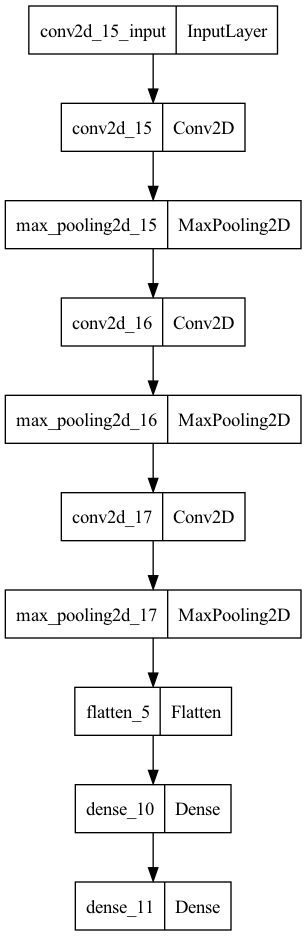

In [78]:
plot_model(model)

In [79]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
108/108 [==============================] - 4s 39ms/step - loss: 1.3139 - accuracy: 0.4179 - val_loss: 1.1534 - val_accuracy: 0.5116
Epoch 2/10
108/108 [==============================] - 4s 38ms/step - loss: 1.0603 - accuracy: 0.5691 - val_loss: 1.1898 - val_accuracy: 0.5266
Epoch 3/10
108/108 [==============================] - 4s 38ms/step - loss: 0.9306 - accuracy: 0.6244 - val_loss: 0.9450 - val_accuracy: 0.6481
Epoch 4/10
108/108 [==============================] - 4s 39ms/step - loss: 0.8400 - accuracy: 0.6754 - val_loss: 0.9310 - val_accuracy: 0.6273
Epoch 5/10
108/108 [==============================] - 4s 39ms/step - loss: 0.7650 - accuracy: 0.7052 - val_loss: 0.8760 - val_accuracy: 0.6609
Epoch 6/10
108/108 [==============================] - 4s 39ms/step - loss: 0.6642 - accuracy: 0.7376 - val_loss: 1.0163 - val_accuracy: 0.6562
Epoch 7/10
108/108 [==============================] - 4s 39ms/step - loss: 0.5989 - accuracy: 0.7715 - val_loss: 0.8598 - val_accuracy: 0.6863

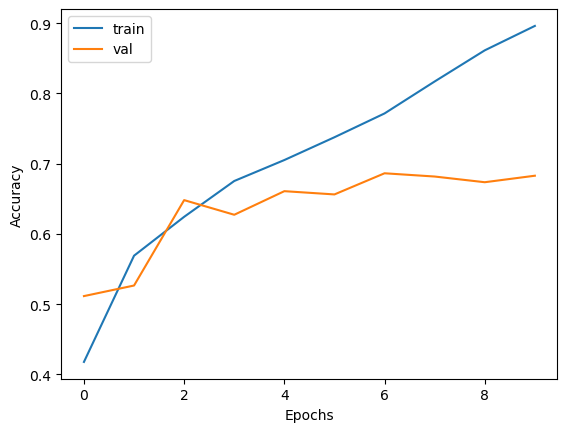

In [80]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

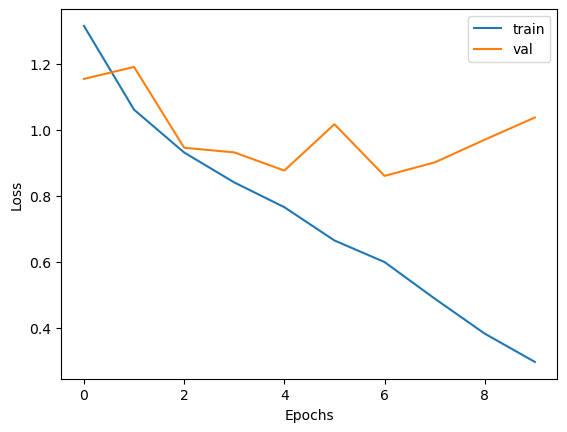

In [81]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [82]:
model.save("FlowerModel.h5")

In [88]:
X_test.shape, y_test.shape

((864, 64, 64, 3), (864, 5))

In [126]:
rand_idx = np.random.randint(0, 864)

In [127]:
image = X_test[rand_idx]
label = y_test[rand_idx]

In [128]:
preds = model.predict(np.expand_dims(image, axis=0))

1/1 [==============================] - 0s 21ms/step


In [129]:
predicted = np.argmax(preds)

In [130]:
print("Predicted: ", predicted)
print("Actual: ", label) # [0. 0. 0. 1. 0.] = 3 (index)

Predicted:  3
Actual:  [0. 0. 0. 1. 0.]
